In [22]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [16]:
df_train.head()

index  daya_baterai  bluetooth  kecepatan_clock  dual_sim  kamera_depan  \
0   1045           531          0              1.1         0            10   
1    937           764          1              1.2         1             1   
2   1658          1812          1              1.3         1             4   
3    529          1821          0              0.9         0             9   
4    895          1790          1              2.3         1             3   

  four_g  memori_internal  tebal_hp  berat_hp  ...  px_panjang  px_lebar  \
0  Tidak               63       0.7       189  ...         145      1903   
1  Tidak               13       1.0       152  ...         361       511   
2     Ya               42       1.0       162  ...         380      1550   
3     Ya               12       0.3       114  ...          97      1803   
4     Ya               49       0.5       100  ...         396      1980   

   kapasitas_ram  panjang_layar  lebar_layar  waktu_telfon  three_g  \
0           2958           17.0            1            19        0   
1           3148           18.0            7             6        1   
2           3338           18.0           13            11        1   
3           2430            7.0            4             6        1   
4           3568            6.0            2            18        1   

   touch_screen  wifi  price_range  
0             1     0  2000k-3000k  
1             1     0  2000k-3000k  
2             1     1       >3000k  
3             1     1  2000k-3000k  
4             0     1       >3000k  

[5 rows x 22 columns]

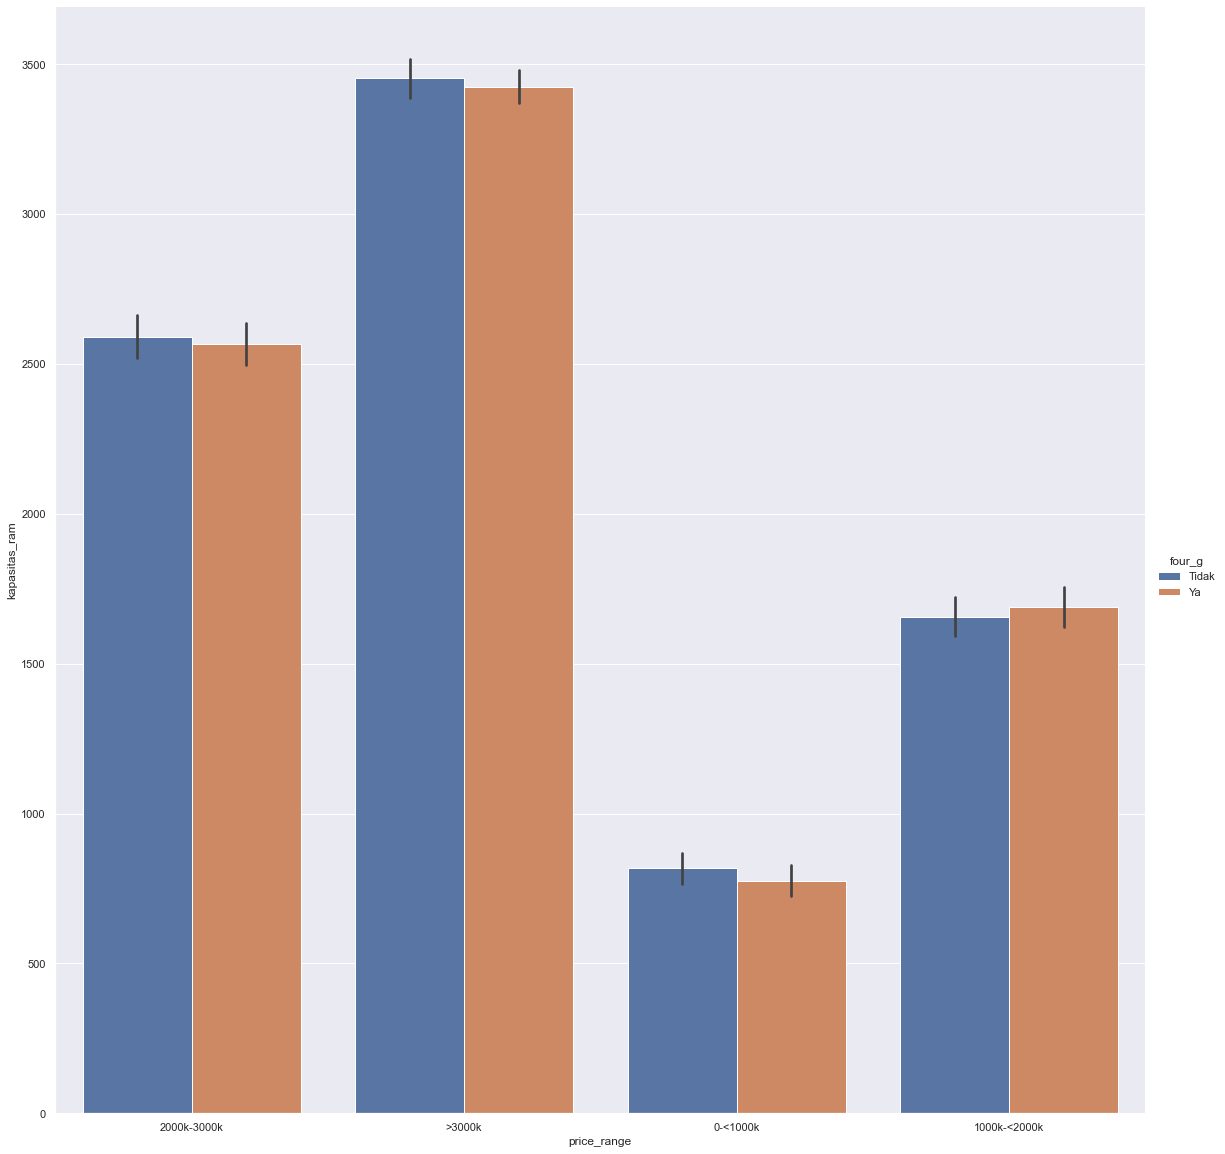

In [17]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})
sns.catplot(x='price_range', y = 'kapasitas_ram', hue = 'four_g', data = df_train, kind = 'bar', height = 16)

<AxesSubplot:xlabel='price_range', ylabel='count'>

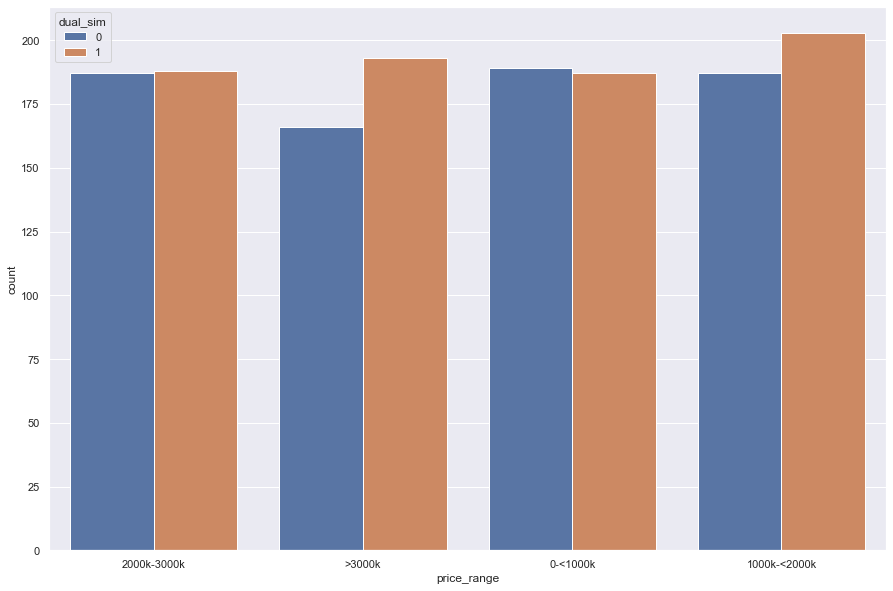

In [18]:
sns.countplot(x = 'price_range', hue = 'dual_sim', data = df_train)

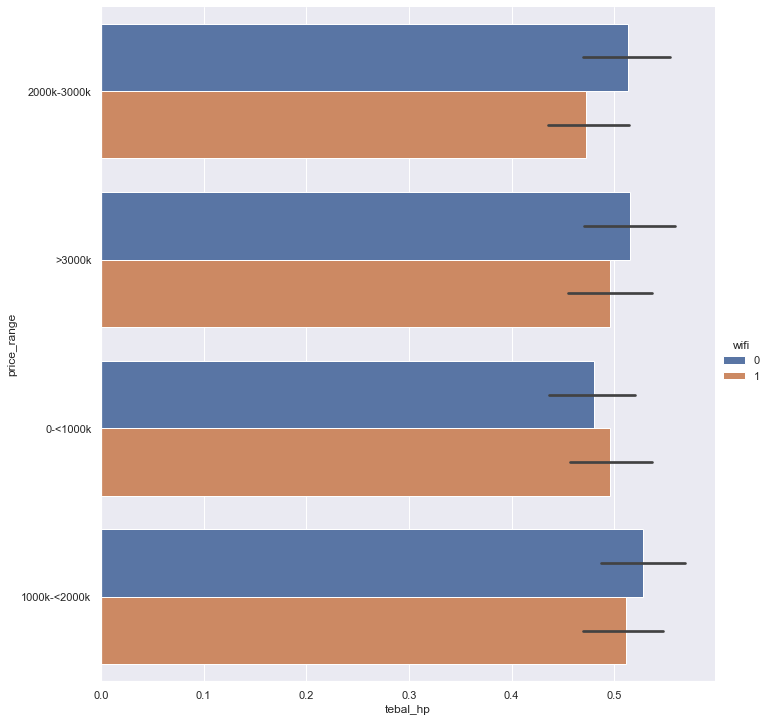

In [19]:
sns.catplot(x = 'tebal_hp', y = 'price_range', hue = 'wifi', data = df_train, kind = 'bar', height = 10)

In [23]:
ubah = {
    '0-<1000k':0,
    '1000k-<2000k':1,
    '2000k-3000k':2,
    '>3000k':3}
df_train.replace(ubah, inplace = True)
ubah2 = {'Ya':1, 'Tidak':0}
df_train.replace(ubah2, inplace = True)
df_test.replace(ubah2, inplace = True)
df_train['kecepatan_clock'] = df_train['kecepatan_clock'].fillna(df_train['kecepatan_clock'].mean())
df_train['panjang_layar'] = df_train['panjang_layar'].fillna(df_train['panjang_layar'].mean())
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1500 non-null   int64  
 1   daya_baterai        1500 non-null   int64  
 2   bluetooth           1500 non-null   int64  
 3   kecepatan_clock     1500 non-null   float64
 4   dual_sim            1500 non-null   int64  
 5   kamera_depan        1500 non-null   int64  
 6   four_g              1500 non-null   int64  
 7   memori_internal     1500 non-null   int64  
 8   tebal_hp            1500 non-null   float64
 9   berat_hp            1500 non-null   int64  
 10  jumlah_prosesor     1500 non-null   int64  
 11  kamera_belakang_mp  1500 non-null   int64  
 12  px_panjang          1500 non-null   int64  
 13  px_lebar            1500 non-null   int64  
 14  kapasitas_ram       1500 non-null   int64  
 15  panjang_layar       1500 non-null   float64
 16  lebar_

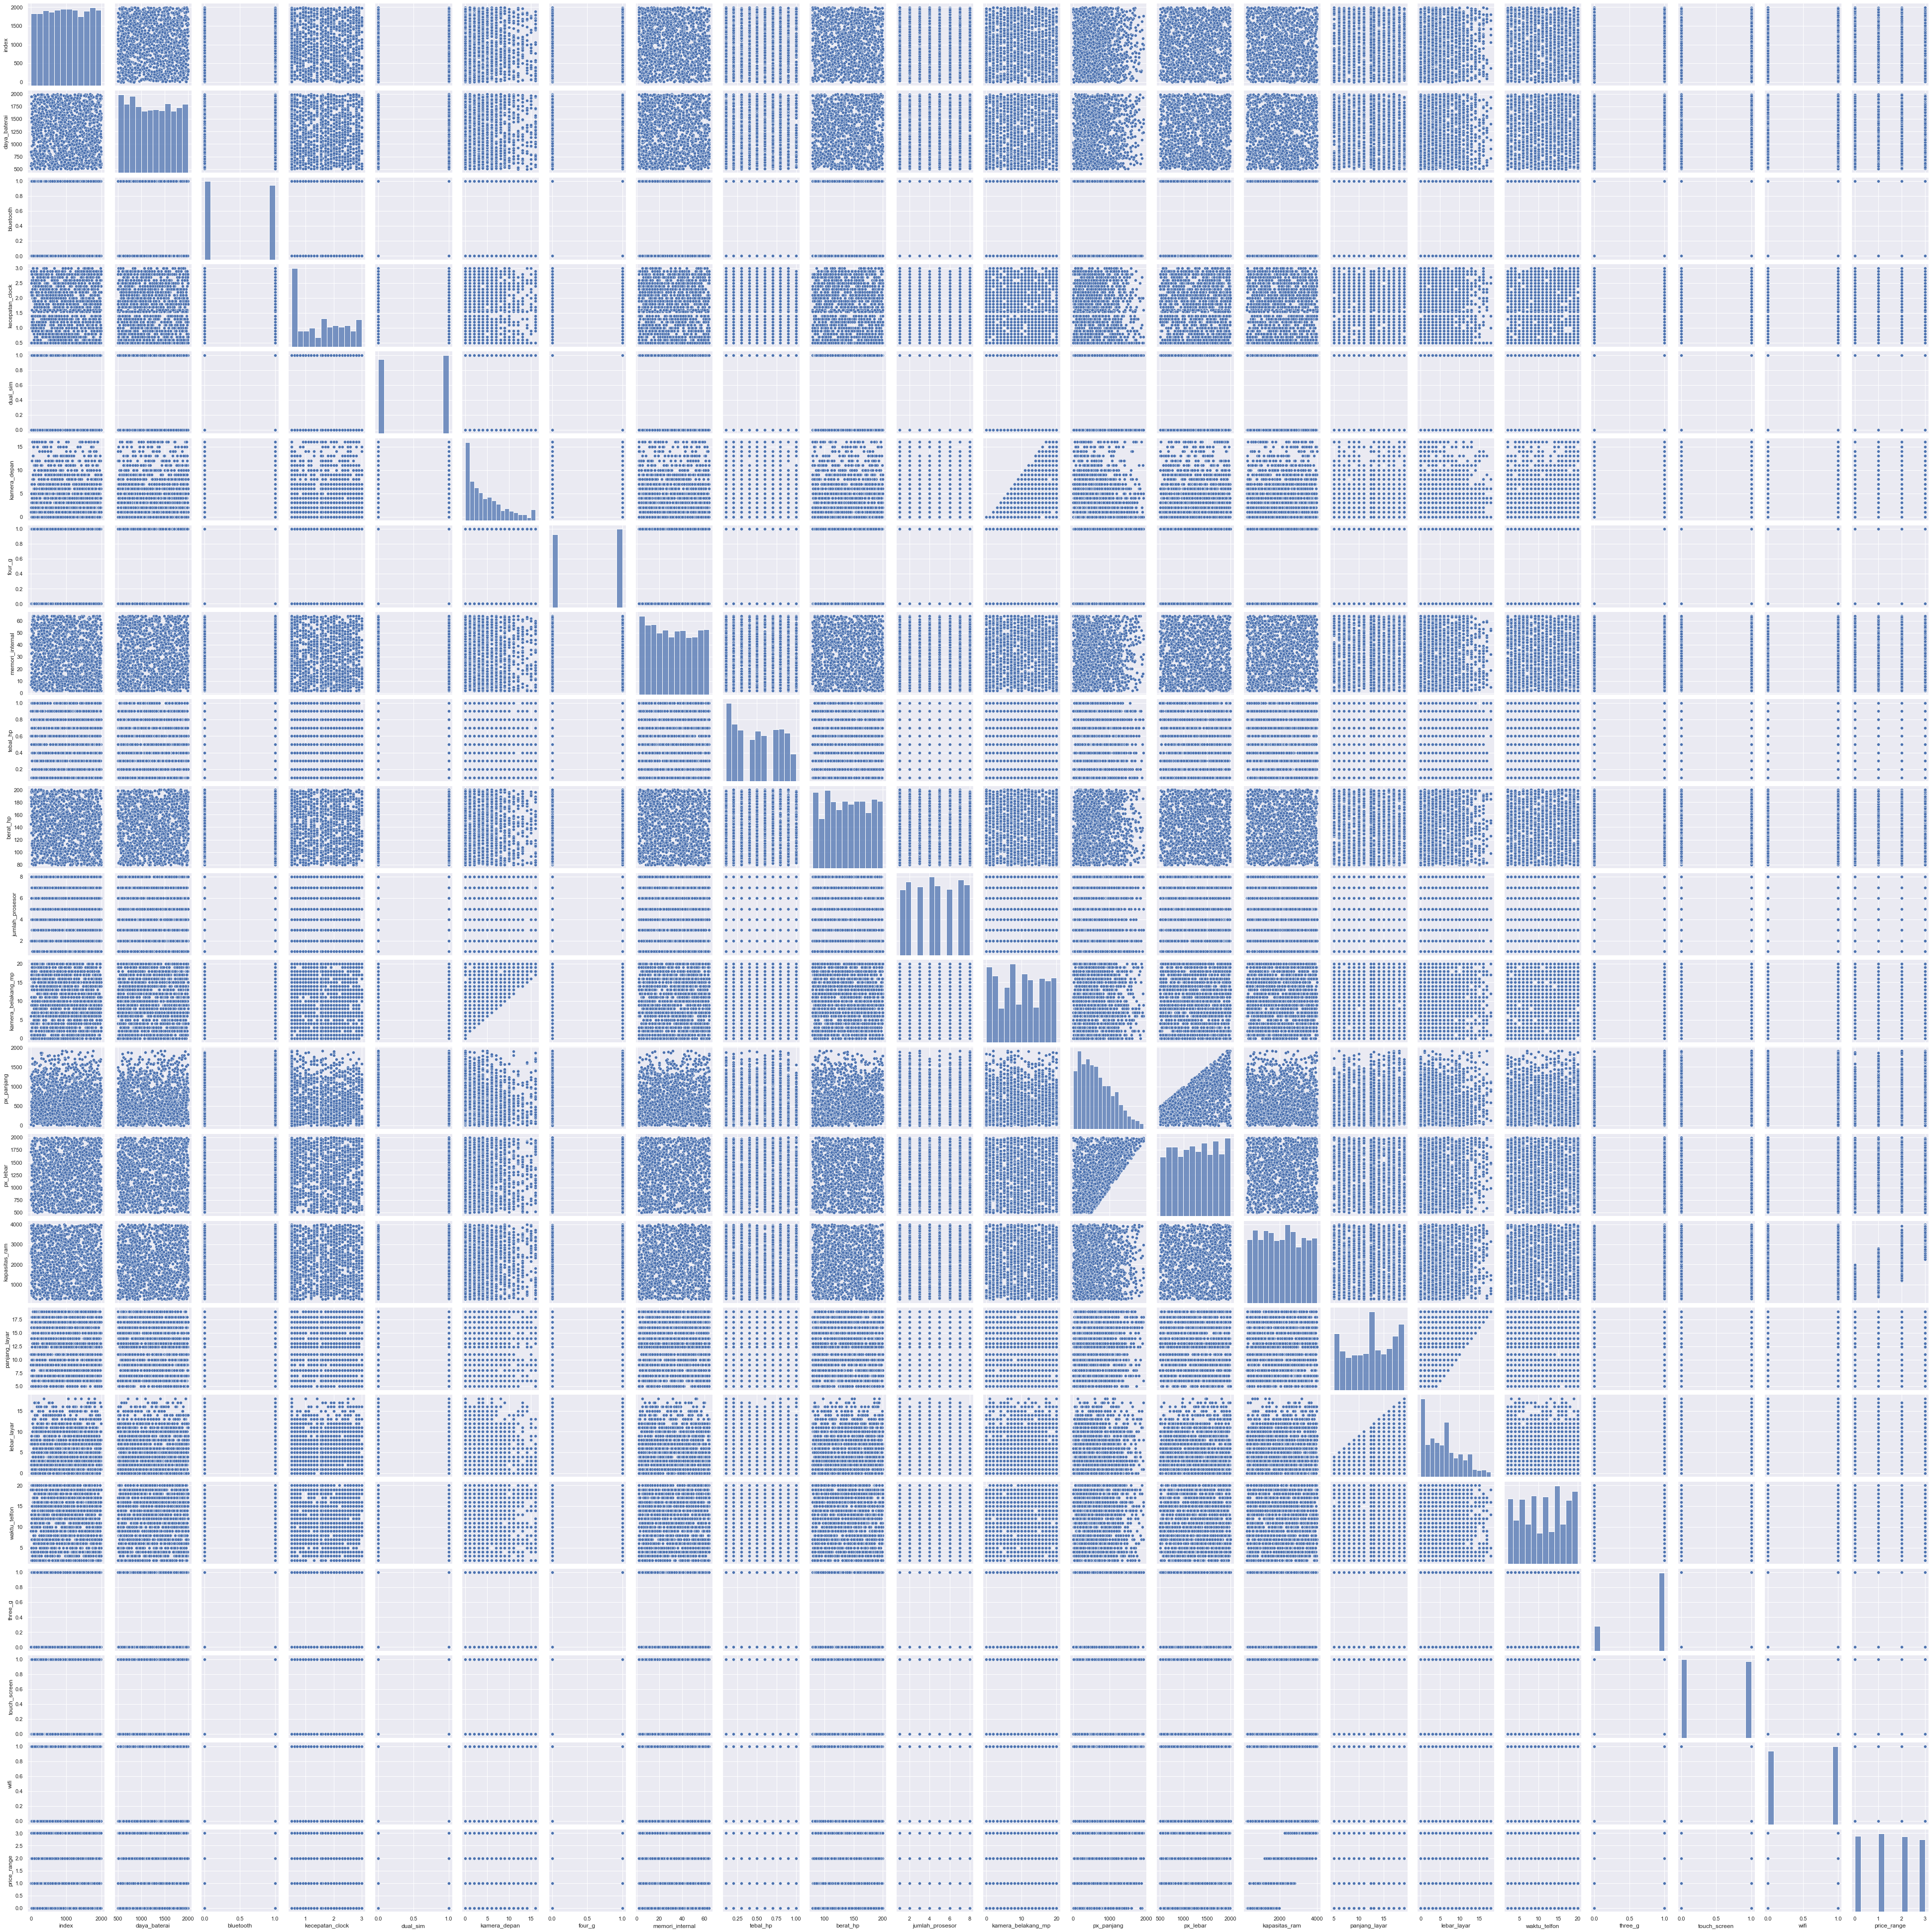

In [24]:
sns.pairplot(df_train)

<AxesSubplot:>

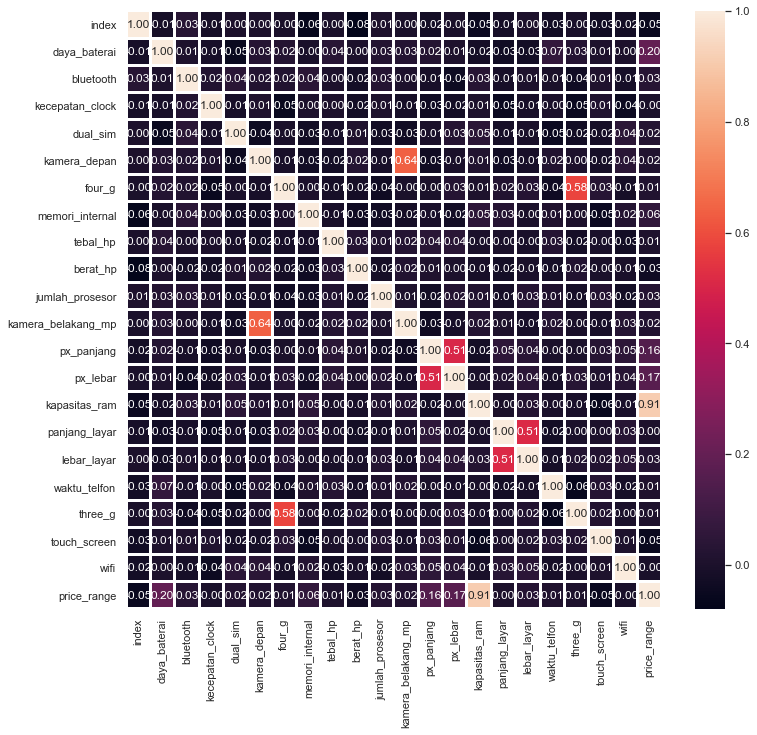

In [25]:
sns.set(rc = {'figure.figsize':(12,11)})
sns.heatmap(df_train.corr(), annot = True, fmt = '.2f', linewidth = 2)

In [51]:
#Scaling
from sklearn.preprocessing import StandardScaler

X = df_train.drop("price_range", axis=1)
y = df_train["price_range"]

cols = X.columns
cols2 = df_test.columns

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(df_test)

X = pd.DataFrame(X, columns = cols)
X_test = pd.DataFrame(X_test, columns = cols)

X.head()

index  daya_baterai  bluetooth  kecepatan_clock  dual_sim  kamera_depan  \
0  0.068396     -1.589547  -0.976281        -0.546049 -1.028403      1.369927   
1 -0.119240     -1.062043   1.024295        -0.423975  0.972381     -0.751433   
2  1.133405      1.310596   1.024295        -0.301901  0.972381     -0.044313   
3 -0.828088      1.330972  -0.976281        -0.790197 -1.028403      1.134221   
4 -0.192210      1.260789   1.024295         0.918837  0.972381     -0.280020   

     four_g  memori_internal  tebal_hp  berat_hp  ...  kamera_belakang_mp  \
0 -1.033908         1.694932  0.688741  1.420497  ...            0.695501   
1 -1.033908        -1.034662  1.729485  0.365630  ...           -1.287239   
2  0.967204         0.548503  1.729485  0.650729  ...            0.860729   
3  0.967204        -1.089253 -0.698917 -0.717746  ...            1.356414   
4  0.967204         0.930646 -0.005088 -1.116885  ...            0.199816   

   px_panjang  px_lebar  kapasitas_ram  panjang_layar  lebar_layar  \
0   -1.147405  1.471958       0.797948       1.109189    -1.098458   
1   -0.662840 -1.734394       0.974958       1.348756     0.263267   
2   -0.620216  0.658853       1.151968       1.348756     1.624991   
3   -1.255086  1.241617       0.306046      -1.286479    -0.417596   
4   -0.584323  1.649321       1.366244      -1.526046    -0.871504   

   waktu_telfon   three_g  touch_screen      wifi  
0      1.454654 -1.779513      1.010724 -1.028403  
1     -0.918454  0.561951      1.010724 -1.028403  
2     -0.005720  0.561951      1.010724  0.972381  
3     -0.918454  0.561951      1.010724  0.972381  
4      1.272107  0.561951     -0.989390  0.972381  

[5 rows x 21 columns]

In [52]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param = ({'n_neighbors': np.arange(1, 55), 'weights':['uniform','distance']})
scoring = make_scorer(f1_score, average = 'micro')
gcv = GridSearchCV(knn, param, cv = 5, scoring = scoring)
gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)

0.6073333333333333
{'n_neighbors': 53, 'weights': 'distance'}


In [53]:
#coba tanpa scaling
X = df_train.drop("price_range", axis=1)
y = df_train["price_range"]

knn = KNeighborsClassifier()
param = ({'n_neighbors': np.arange(1, 55), 'weights':['uniform','distance']})
scoring = make_scorer(f1_score, average = 'micro')
gcv = GridSearchCV(knn, param, cv = 5, scoring = scoring)
gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)

0.914
{'n_neighbors': 20, 'weights': 'distance'}


In [54]:
#coba svc dengan scaling
from sklearn.svm import SVC

X = df_train.drop("price_range", axis=1)
y = df_train["price_range"]

cols = X.columns
cols2 = df_test.columns

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(df_test)

X = pd.DataFrame(X, columns = cols)
X_test = pd.DataFrame(X_test, columns = cols)

svc = SVC()
param = ({'kernel': ['linear', 'poly', 'rbf'], 'gamma':['scale','auto']})
scoring = make_scorer(f1_score, average = 'micro')
gcv = GridSearchCV(svc, param, cv = 5, scoring = scoring)
gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)

0.9546666666666667
{'gamma': 'scale', 'kernel': 'linear'}


In [55]:
# coba tanpa scaling
X = df_train.drop("price_range", axis=1)
y = df_train["price_range"]

svc = SVC()
param = ({'kernel': ['linear', 'poly', 'rbf'], 'gamma':['scale','auto']})
scoring = make_scorer(f1_score, average = 'micro')
gcv = GridSearchCV(svc, param, cv = 5, scoring = scoring)
gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)

0.9720000000000001
{'gamma': 'scale', 'kernel': 'linear'}


In [56]:
# dipilih svc tanpa scaling
svc = gcv.best_estimator_
svc.fit(X, y)

SVC(kernel='linear')

In [57]:
submission = svc.predict(df_test)
newdata = {'index':df_test['index'], 'price_range':submission}
newdata = pd.DataFrame(newdata)
newdata.to_csv('submission.csv', index = False) 